In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
list1 = [random.randint(1, 100) for _ in range(100)]
list2 = [random.randint(1, 100) for _ in range(100)]

print("Первый список:", list1)
print("Второй список:", list2)

Первый список: [13, 51, 18, 56, 39, 52, 16, 50, 26, 18, 50, 80, 12, 58, 17, 28, 84, 22, 51, 41, 100, 49, 83, 12, 53, 49, 76, 43, 25, 14, 31, 42, 46, 39, 62, 31, 19, 74, 52, 44, 22, 82, 36, 52, 26, 13, 20, 4, 12, 8, 18, 100, 3, 39, 82, 17, 24, 64, 75, 51, 92, 10, 32, 22, 96, 5, 56, 85, 22, 32, 91, 38, 25, 9, 4, 2, 95, 42, 86, 47, 79, 68, 76, 36, 65, 3, 27, 66, 96, 9, 8, 2, 16, 34, 96, 41, 90, 93, 83, 67]
Второй список: [77, 36, 90, 56, 85, 22, 27, 42, 74, 22, 57, 1, 31, 38, 4, 68, 9, 73, 28, 45, 6, 67, 38, 57, 11, 12, 27, 84, 17, 35, 79, 74, 22, 10, 53, 62, 85, 93, 65, 28, 36, 5, 62, 39, 12, 18, 85, 81, 62, 43, 68, 16, 98, 80, 14, 28, 3, 33, 29, 59, 75, 33, 51, 90, 52, 100, 54, 63, 38, 81, 65, 12, 27, 65, 75, 68, 26, 96, 54, 97, 47, 71, 92, 67, 77, 70, 93, 40, 78, 76, 71, 19, 52, 54, 32, 46, 18, 71, 19, 64]


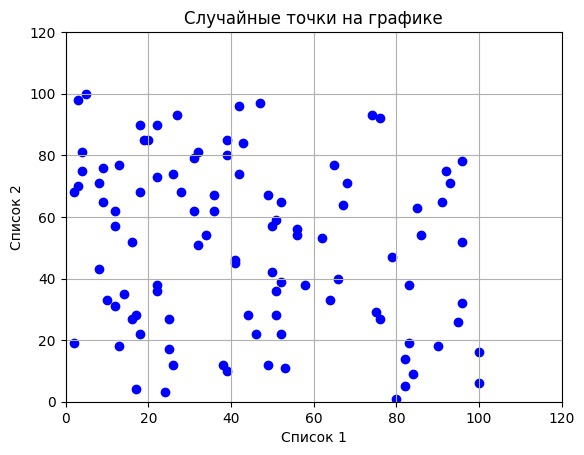

In [14]:
plt.scatter(list1, list2, color='blue', marker='o')
plt.title('Случайные точки на графике')
plt.xlabel('Список 1')
plt.ylabel('Список 2')
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.grid()
plt.show()

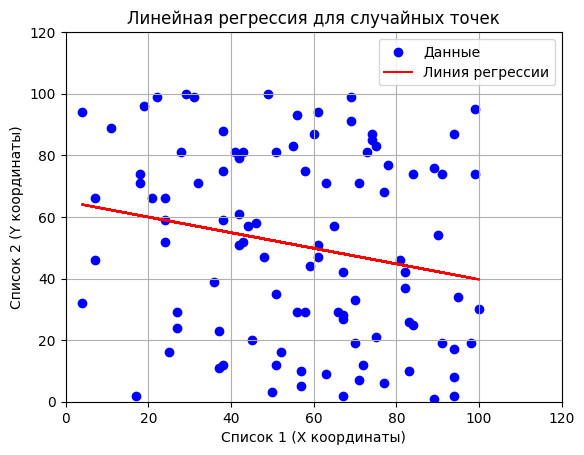

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Создание первого рандомного списка
list1 = [random.randint(1, 100) for _ in range(100)]
# Создание второго рандомного списка
list2 = [random.randint(1, 100) for _ in range(100)]

# Преобразование списков в numpy массивы
X = np.array(list1).reshape(-1, 1)  # Преобразуем в 2D массив для scikit-learn
y = np.array(list2)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Предсказание значений
y_pred = model.predict(X)

# Отображение точек и линии регрессии на графике
plt.scatter(list1, list2, color='blue', marker='o', label='Данные')
plt.plot(list1, y_pred, color='red', label='Линия регрессии')
plt.title('Линейная регрессия для случайных точек')
plt.xlabel('Список 1 (X координаты)')
plt.ylabel('Список 2 (Y координаты)')
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.grid()
plt.legend()
plt.show()


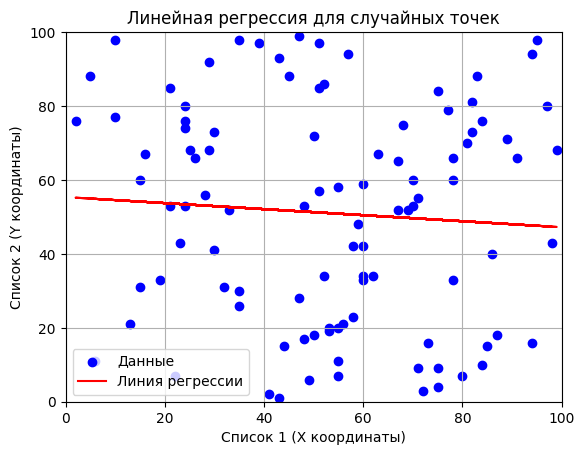

Уравнение регрессии: y = -0.08 * x + 55.37
Коэффициент корреляции: -0.07


In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Создание первого рандомного списка
list1 = [random.randint(1, 100) for _ in range(100)]
# Создание второго рандомного списка
list2 = [random.randint(1, 100) for _ in range(100)]

# Преобразование списков в numpy массивы
X = np.array(list1).reshape(-1, 1)  # Преобразуем в 2D массив для scikit-learn
y = np.array(list2)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов
slope = model.coef_[0]  # Коэффициент наклона (угловой коэффициент)
intercept = model.intercept_  # Свободный член (пересечение с осью Y)

# Предсказание значений
y_pred = model.predict(X)

# Вычисление коэффициента корреляции
correlation_coefficient = np.corrcoef(list1, list2)[0, 1]

# Отображение точек и линии регрессии на графике
plt.scatter(list1, list2, color='blue', marker='o', label='Данные')
plt.plot(list1, y_pred, color='red', label='Линия регрессии')
plt.title('Линейная регрессия для случайных точек')
plt.xlabel('Список 1 (X координаты)')
plt.ylabel('Список 2 (Y координаты)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()
plt.legend()
plt.show()

# Вывод коэффициентов и коэффициента корреляции
print(f"Уравнение регрессии: y = {slope:.2f} * x + {intercept:.2f}")
print(f"Коэффициент корреляции: {correlation_coefficient:.2f}")


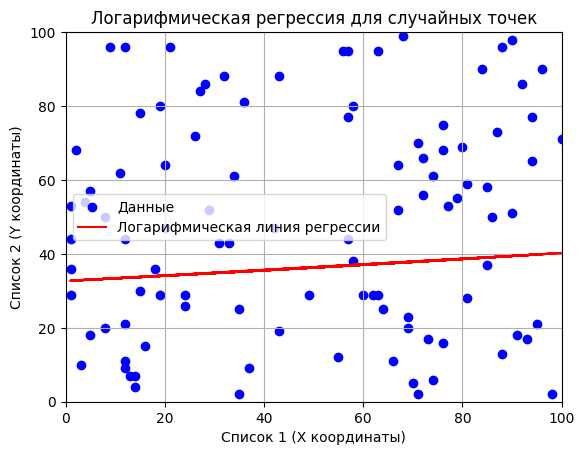

Уравнение логарифмической регрессии: log(y) = 0.00 * x + 3.52


In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Создание первого рандомного списка
list1 = [random.randint(1, 100) for _ in range(100)]
# Создание второго рандомного списка
list2 = [random.randint(1, 100) for _ in range(100)]

# Преобразование списков в numpy массивы
X = np.array(list1).reshape(-1, 1)  # Преобразуем в 2D массив для scikit-learn
y = np.array(list2)

# Применение логарифма к зависимой переменной
y_log = np.log(y + 1)  # Добавляем 1, чтобы избежать логарифма нуля

# Создание и обучение модели логарифмической регрессии
model = LinearRegression()
model.fit(X, y_log)

# Получение коэффициентов
slope = model.coef_[0]  # Коэффициент наклона (угловой коэффициент)
intercept = model.intercept_  # Свободный член (пересечение с осью Y)

# Предсказание значений
y_log_pred = model.predict(X)

# Преобразование предсказанных значений обратно в оригинальную шкалу
y_pred = np.exp(y_log_pred) - 1  # Обратное преобразование логарифма

# Отображение точек и линии регрессии на графике
plt.scatter(list1, list2, color='blue', marker='o', label='Данные')
plt.plot(list1, y_pred, color='red', label='Логарифмическая линия регрессии')
plt.title('Логарифмическая регрессия для случайных точек')
plt.xlabel('Список 1 (X координаты)')
plt.ylabel('Список 2 (Y координаты)')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid()
plt.legend()
plt.show()

# Вывод коэффициентов
print(f"Уравнение логарифмической регрессии: log(y) = {slope:.2f} * x + {intercept:.2f}")
